# Exploratory analysis of the effect of Covid19 on the Nigerian Economy

### Data Collection
Here you will obtain the required data for the analysis. As described in the project instructions, you will perform a web scrap to obtain data from the NCDC website, import data from the John Hopkins repository, and import the provided external data.


### A - NCDC Website scrap
Website - https://covid19.ncdc.gov.ng/

In [1]:
# Write Your Code Below
# Import all libraries in this cell
import requests as rqst
import numpy as np
import urllib.request
import pandas as pd
import csv
from bs4 import BeautifulSoup as bs
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')  
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Save the data to a DataFrame object.

# I passed the weblink to a variable
url = 'https://covid19.ncdc.gov.ng/'

# I used the request() from the request library to make a request of the html codes from the backend
html_code = rqst.get(url)

# I then used the beautifulsoup function to collect the html codes
soup = bs(html_code.text, 'html.parser')

# I looked into the soup to fetch the chunk of codes containing the table as follows:
table = soup.find('table', id = 'custom1')

# I collect the column names fromn the html codes as follows:
col_names = []
for col_name in table.find_all('th'):
    title = col_name.text.strip()
    col_names.append(title)
    
# I then used a loop to fetch the table info from the hmtl codes as follows:
table_data = []
for x in table.find_all('tr')[1:]:
    td_tags = x.find_all('td')
    td_val = [y.text.strip().replace(',', '') for y in td_tags] # I used the strip() and replace() to remove lagging, trailing spaces, and the ',' within the numbers respectively
    table_data.append(td_val)
    
# I then created the NCDC data frame using the pandas.DataFrame() as follows:
ncdc_df = pd.DataFrame(table_data, columns=col_names)

### B - John Hopkins Data Repository
Here you will obtain data from the John Hopkins repository. Your task here involves saving the data from the GitHub repo link to DataFrame for further analysis. Find the links below. 
* Global Daily Confirmed Cases - Click [Here](https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv)
* Global Daily Recovered Cases - Click [Here](https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv)
* Global Daily Death Cases - Click [Here](https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv)

In [3]:
# I created variable for each url to read the daily covid cases data set from the John Hopkins Data Repository
url1='https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
url2='https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
url3='https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'

In [4]:
dailyconfirmedcases = pd.read_csv(url1)

In [5]:
dailyrecoveredcases = pd.read_csv(url2)

In [6]:
dailydeathcases = pd.read_csv(url3)

### C - External Data 
* Save the external data to a DataFrame
* External Data includes but not limited to: `covid_external.csv`, `Budget data.csv`, `RealGDP.csv`

In [7]:
#[Write Your Code Here]
cov_ext = pd.read_csv('covid_external.csv')
budget = pd.read_csv('Budget data.csv')
gdp = pd.read_csv('RealGDP.csv')

### Task 2 - View the data
Obtain basic information about the data using the `head()` and `info()` method.

In [8]:
#[Write Your Code Here]
ncdc_df.head()

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,Lagos,104014,871,102372,771
1,FCT,29464,143,29072,249
2,Rivers,18044,89,17800,155
3,Kaduna,11576,11,11476,89
4,Oyo,10332,3,10127,202


In [9]:
ncdc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   States Affected               37 non-null     object
 1   No. of Cases (Lab Confirmed)  37 non-null     object
 2   No. of Cases (on admission)   37 non-null     object
 3   No. Discharged                37 non-null     object
 4   No. of Deaths                 37 non-null     object
dtypes: object(5)
memory usage: 1.6+ KB


In [10]:
dailyconfirmedcases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,10/7/22,10/8/22,10/9/22,10/10/22,10/11/22,10/12/22,10/13/22,10/14/22,10/15/22,10/16/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,200130,200202,200372,200469,200626,200729,200846,201014,201096,201212
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,332443,332472,332494,332503,332534,332555,332579,332598,332619,332638
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,270701,270701,270707,270713,270716,270722,270722,270734,270734,270740
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,46275,46275,46275,46275,46275,46366,46366,46366,46366,46366
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,103131,103131,103131,103131,103131,103131,103131,103131,103131,103131


In [11]:
dailyconfirmedcases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Columns: 1003 entries, Province/State to 10/16/22
dtypes: float64(2), int64(999), object(2)
memory usage: 2.2+ MB


In [12]:
dailyrecoveredcases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,10/7/22,10/8/22,10/9/22,10/10/22,10/11/22,10/12/22,10/13/22,10/14/22,10/15/22,10/16/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
dailyrecoveredcases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 0 to 273
Columns: 1003 entries, Province/State to 10/16/22
dtypes: float64(2), int64(999), object(2)
memory usage: 2.1+ MB


In [14]:
dailydeathcases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,10/7/22,10/8/22,10/9/22,10/10/22,10/11/22,10/12/22,10/13/22,10/14/22,10/15/22,10/16/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7804,7804,7806,7807,7807,7807,7809,7809,7811,7811
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3589,3589,3589,3589,3590,3591,3591,3591,3591,3591
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,155,155,155,155,155,155,155,155,155,155
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1917,1917,1917,1917,1917,1917,1917,1917,1917,1917


In [15]:
dailydeathcases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Columns: 1003 entries, Province/State to 10/16/22
dtypes: float64(2), int64(999), object(2)
memory usage: 2.2+ MB


In [16]:
cov_ext.head()

,states,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
0,FCT,North Central,4865000,0.3,0.0,0.9,0.4,0.6,0.9,0.6,0.2,0.79
1,Plateau,North Central,4766000,0.4,0.5,0.4,0.8,0.3,0.3,0.5,0.3,0.93
2,Kwara,North Central,3524000,0.3,0.4,0.3,0.2,0.4,0.2,0.6,0.7,0.93
3,Nassarawa,North Central,2783000,0.1,0.3,0.5,0.9,0.0,0.1,0.6,0.5,0.85
4,Niger,North Central,6260000,0.6,0.0,0.6,0.3,0.7,0.1,0.8,0.8,0.84


In [17]:
cov_ext.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   states                   37 non-null     object 
 1   region                   37 non-null     object 
 2   Population               37 non-null     int64  
 3   Overall CCVI Index       37 non-null     float64
 4   Age                      37 non-null     float64
 5   Epidemiological          37 non-null     float64
 6   Fragility                37 non-null     float64
 7   Health System            37 non-null     float64
 8   Population Density       37 non-null     float64
 9   Socio-Economic           37 non-null     float64
 10   Transport Availability  37 non-null     float64
 11  Acute IHR                37 non-null     float64
dtypes: float64(9), int64(1), object(2)
memory usage: 3.6+ KB


In [18]:
budget.head()

,states,Initial_budget (Bn),Revised_budget (Bn)
0,Abia,136.60,102.70
1,Adamawa,183.30,139.31
2,Akwa-Ibom,597.73,366.00
3,Anambra,137.10,112.80
4,Bauchi,167.20,128.00


In [19]:
budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   states               37 non-null     object 
 1   Initial_budget (Bn)  37 non-null     float64
 2   Revised_budget (Bn)  37 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1016.0+ bytes


In [20]:
gdp

,Year,Q1,Q2,Q3,Q4
0,2014,15438679.50,16084622.31,17479127.58,18150356.45
1,2015,16050601.38,16463341.91,17976234.59,18533752.07
2,2016,15943714.54,16218542.41,17555441.69,18213537.29
3,2017,15797965.83,16334719.27,17760228.17,18598067.07
4,2018,16096654.19,16580508.07,18081342.10,19041437.59
5,2019,16434552.65,16931434.89,18494114.17,19530000.00
6,2020,16740000.00,15890000.00,17820000.00,0.00


In [21]:
gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    7 non-null      int64  
 1   Q1      7 non-null      float64
 2   Q2      7 non-null      float64
 3   Q3      7 non-null      float64
 4   Q4      7 non-null      float64
dtypes: float64(4), int64(1)
memory usage: 408.0 bytes


### Task 3 - Data Cleaning and Preparation
From the information obtained above, you will need to fix the data format. 
<br>
Examples: 
* Convert to appropriate data type.
* Rename the columns of the scraped data.
* Remove comma(,) in numerical data
* Extract daily data for Nigeria from the Global daily cases data

#### Cleaning the scraped data

In [22]:
# To rename the table scraped data columns I used the collowing chunck
ncdc_df.rename(columns = {'States Affected':'states_affected', 'No. of Cases (Lab Confirmed)':'no_cases_lab_confirmed',
                    'No. of Cases (on admission)':'no_cases_admission', 'No. Discharged':'no_discharged',
                    'No. of Deaths':'no_deaths'}, inplace = True)
ncdc_df.head(5)

,states_affected,no_cases_lab_confirmed,no_cases_admission,no_discharged,no_deaths
0,Lagos,104014,871,102372,771
1,FCT,29464,143,29072,249
2,Rivers,18044,89,17800,155
3,Kaduna,11576,11,11476,89
4,Oyo,10332,3,10127,202


In [23]:
ncdc_df.dtypes

states_affected           object
no_cases_lab_confirmed    object
no_cases_admission        object
no_discharged             object
no_deaths                 object
dtype: object

#### observation: All the columns are formatted as strings or object
Hence I have to covert the columns with numeric data into intergers as follows:

In [24]:
ncdc_df[['no_cases_lab_confirmed', 'no_cases_admission',
       'no_discharged', 'no_deaths']] = ncdc_df[['no_cases_lab_confirmed', 'no_cases_admission',
       'no_discharged', 'no_deaths']].astype(str).astype(int)

In [25]:
# I used saved the ncdc datafrme to the repository after cleaning the table
ncdc_df.to_csv("ncdc_df.csv", index = False)
# I then observed if there was was any numeric column formatted as str in the ncdc_df
ncdc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   states_affected         37 non-null     object
 1   no_cases_lab_confirmed  37 non-null     int32 
 2   no_cases_admission      37 non-null     int32 
 3   no_discharged           37 non-null     int32 
 4   no_deaths               37 non-null     int32 
dtypes: int32(4), object(1)
memory usage: 1016.0+ bytes


In [26]:
ncdc_df.head()

,states_affected,no_cases_lab_confirmed,no_cases_admission,no_discharged,no_deaths
0,Lagos,104014,871,102372,771
1,FCT,29464,143,29072,249
2,Rivers,18044,89,17800,155
3,Kaduna,11576,11,11476,89
4,Oyo,10332,3,10127,202


#### Getting a Pandas DataFrame for Daily Confirmed Cases in Nigeria. Columns are Date and Cases

In [27]:
dailyconfirmedcases.head(4)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,10/7/22,10/8/22,10/9/22,10/10/22,10/11/22,10/12/22,10/13/22,10/14/22,10/15/22,10/16/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,200130,200202,200372,200469,200626,200729,200846,201014,201096,201212
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,332443,332472,332494,332503,332534,332555,332579,332598,332619,332638
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,270701,270701,270707,270713,270716,270722,270722,270734,270734,270740
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,46275,46275,46275,46275,46275,46366,46366,46366,46366,46366


In [28]:
# To achieve this, filter for Nigeria in the Country/Region and then drop the columns that are not needed:

# filtering and dropping columns that are not needed and assigning the result in a variable dlcc:
dlcc = dailyconfirmedcases[dailyconfirmedcases['Country/Region'] == 'Nigeria'].drop(columns=(['Province/State', 
                                                                                       'Country/Region', 'Lat', 'Long']))

# I converted the data frame to a long data frame creating just 2 columns date and cases:
dlcc_df = pd.melt(dlcc, var_name='date', value_name='cases')

# check if the data is in a dataframe to confirm the chunk of code
dlcc_df.head()

,date,cases
0,1/22/20,0
1,1/23/20,0
2,1/24/20,0
3,1/25/20,0
4,1/26/20,0


In [29]:
dlcc_df['date'] = dlcc_df['date'].astype('datetime64[ns]')
dlcc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    999 non-null    datetime64[ns]
 1   cases   999 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 15.7 KB


After getting the required dataframe containing the date and the cases columns, I then converted the date column into a datetime data type.

Note that the dlcc_df denotes daily lab confirmed cases dataframe

In [30]:
dlcc_df.head(5)

,date,cases
0,2020-01-22,0
1,2020-01-23,0
2,2020-01-24,0
3,2020-01-25,0
4,2020-01-26,0


#### Getting a Pandas DataFrame for Daily Recovered Cases in Nigeria. Columns are Date and Cases

In [31]:
# To achieve this, filter for Nigeria in the Country/Region and then drop the columns that are not needed:

# filtering and dropping columns that are not needed and assigning the result in a variable dlcc:
drc = dailyrecoveredcases[dailyrecoveredcases['Country/Region'] == 'Nigeria'].drop(columns=(['Province/State', 
                                                                                       'Country/Region', 'Lat', 'Long']))

# I converted the data frame to a long data frame creating just 2 columns date and cases:
drc_df = pd.melt(drc, var_name='date', value_name='cases')

# convert the date column to datetime data type as follows:
drc_df['date'] = drc_df['date'].astype('datetime64[ns]')

In [32]:
drc_df.head()

,date,cases
0,2020-01-22,0
1,2020-01-23,0
2,2020-01-24,0
3,2020-01-25,0
4,2020-01-26,0


In [33]:
drc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    999 non-null    datetime64[ns]
 1   cases   999 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 15.7 KB


Note that drc_df means daily recovered cases data frame

#### Getting a Pandas DataFrame for Daily Death Cases in Nigeria. Columns are Date and Cases

In [34]:
# To achieve this, filter for Nigeria in the Country/Region and then drop the columns that are not needed:

# filtering and dropping columns that are not needed and assigning the result in a variable dlcc:
ddc = dailydeathcases[dailydeathcases['Country/Region'] == 'Nigeria'].drop(columns=(['Province/State', 
                                                                                       'Country/Region', 'Lat', 'Long']))

# I converted the data frame to a long data frame creating just 2 columns date and cases:
ddc_df = pd.melt(ddc, var_name='date', value_name='cases')

# convert the date column to datetime data type as follows:
ddc_df['date'] = ddc_df['date'].astype('datetime64[ns]')

In [35]:
ddc_df.head()

,date,cases
0,2020-01-22,0
1,2020-01-23,0
2,2020-01-24,0
3,2020-01-25,0
4,2020-01-26,0


In [36]:
ddc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    999 non-null    datetime64[ns]
 1   cases   999 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 15.7 KB


Note that ddc_df denotes daily death cases dataframe

#### Evaluation of the data before the analysis:

- data types are now formatted correctly 
- we are now ready for our exploration and analysis
- the data collected are stored in dataframes as follows:
 - `ncdc_df`: Nigeria Centre for Disease Control (NCDC) data set
 - `dlcc_df`: daily cases(lab confirmed)- John Hopkin's Repository
 - `drc_df`: daily recovered cases - John Hopkin's Repository
 - `ddc_df`: daily death cases - John Hopkin's Repository
 - `cov_ext`: external data set in the project repository
 - `budget`: budget data set in this project repo
 - `gdp`: the gross domestic product data set in this repository


In [37]:
ncdc_df.head()

,states_affected,no_cases_lab_confirmed,no_cases_admission,no_discharged,no_deaths
0,Lagos,104014,871,102372,771
1,FCT,29464,143,29072,249
2,Rivers,18044,89,17800,155
3,Kaduna,11576,11,11476,89
4,Oyo,10332,3,10127,202


In [38]:
dlcc_df.head()

,date,cases
0,2020-01-22,0
1,2020-01-23,0
2,2020-01-24,0
3,2020-01-25,0
4,2020-01-26,0


In [39]:
drc_df.head()

,date,cases
0,2020-01-22,0
1,2020-01-23,0
2,2020-01-24,0
3,2020-01-25,0
4,2020-01-26,0


In [40]:
ddc_df.head()

,date,cases
0,2020-01-22,0
1,2020-01-23,0
2,2020-01-24,0
3,2020-01-25,0
4,2020-01-26,0


In [41]:
gdp.head()

,Year,Q1,Q2,Q3,Q4
0,2014,15438679.50,16084622.31,17479127.58,18150356.45
1,2015,16050601.38,16463341.91,17976234.59,18533752.07
2,2016,15943714.54,16218542.41,17555441.69,18213537.29
3,2017,15797965.83,16334719.27,17760228.17,18598067.07
4,2018,16096654.19,16580508.07,18081342.10,19041437.59


In [42]:
cov_ext.head()

,states,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
0,FCT,North Central,4865000,0.3,0.0,0.9,0.4,0.6,0.9,0.6,0.2,0.79
1,Plateau,North Central,4766000,0.4,0.5,0.4,0.8,0.3,0.3,0.5,0.3,0.93
2,Kwara,North Central,3524000,0.3,0.4,0.3,0.2,0.4,0.2,0.6,0.7,0.93
3,Nassarawa,North Central,2783000,0.1,0.3,0.5,0.9,0.0,0.1,0.6,0.5,0.85
4,Niger,North Central,6260000,0.6,0.0,0.6,0.3,0.7,0.1,0.8,0.8,0.84


In [43]:
budget.head()

,states,Initial_budget (Bn),Revised_budget (Bn)
0,Abia,136.60,102.70
1,Adamawa,183.30,139.31
2,Akwa-Ibom,597.73,366.00
3,Anambra,137.10,112.80
4,Bauchi,167.20,128.00


### Task 4 - Analysis
Here you will perform some analyses on the datasets. You are welcome to communicate findings in charts and summary. 
<br>
We have included a few TODOs to help with your analysis. However, do not let this limit your approach, feel free to include more, and be sure to support your findings with chart and summary 

TODO A - Generate a plot that shows the Top 10 states in terms of Confirmed Covid cases by Laboratory test

In [44]:
# to generate a plot that shows the top ten states with covid confirmed cases, I have to filter for the top 10 states first before the viz

top_10_cc = ncdc_df.nlargest(10, 'no_cases_lab_confirmed')[['states_affected', 'no_cases_lab_confirmed']]
top_10_cc

,states_affected,no_cases_lab_confirmed
0,Lagos,104014
1,FCT,29464
2,Rivers,18044
3,Kaduna,11576
4,Oyo,10332
5,Plateau,10330
6,Edo,7923
7,Ogun,5810
8,Delta,5784
9,Kano,5339


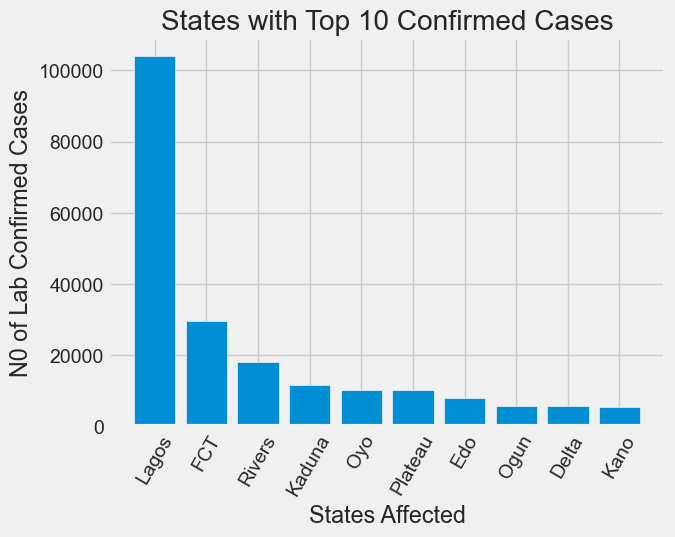

In [45]:
# I then visualize the data using the syntax below:
plt.bar(x='states_affected', height='no_cases_lab_confirmed', data=top_10_cc)
plt.title('States with Top 10 Confirmed Cases')
plt.xticks(rotation=60)
plt.xlabel('States Affected')
plt.ylabel('N0 of Lab Confirmed Cases');

TODO B - Generate a plot that shows the Top 10 states in terms of Discharged Covid cases. Hint - Sort the values

In [46]:
# top_10_dc denotes the states with the top 10 discharge cases

top_10_dc = ncdc_df.nlargest(10, 'no_discharged')[['states_affected', 'no_discharged']]
top_10_dc

,states_affected,no_discharged
0,Lagos,102372
1,FCT,29072
2,Rivers,17800
3,Kaduna,11476
5,Plateau,10252
4,Oyo,10127
6,Edo,7601
7,Ogun,5717
8,Delta,5170
9,Kano,5068


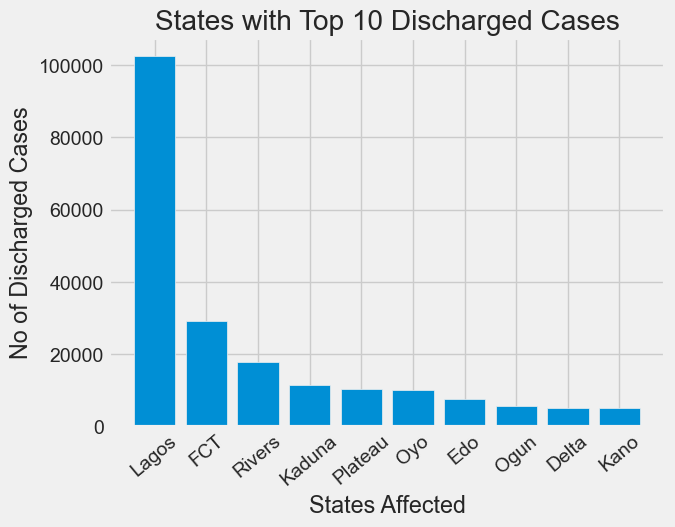

In [47]:
# I then visualize the data using the syntax below:
plt.bar(x='states_affected', height='no_discharged', data=top_10_dc)
plt.title('States with Top 10 Discharged Cases')
plt.xticks(rotation=40)
plt.xlabel('States Affected')
plt.ylabel('No of Discharged Cases');

TODO D - Plot the top 10 Death cases

In [48]:
top_10_death = ncdc_df.nlargest(10, 'no_deaths')[['states_affected', 'no_deaths']]
top_10_death

,states_affected,no_deaths
0,Lagos,771
6,Edo,322
1,FCT,249
4,Oyo,202
2,Rivers,155
9,Kano,127
8,Delta,112
10,Ondo,109
14,Osun,92
3,Kaduna,89


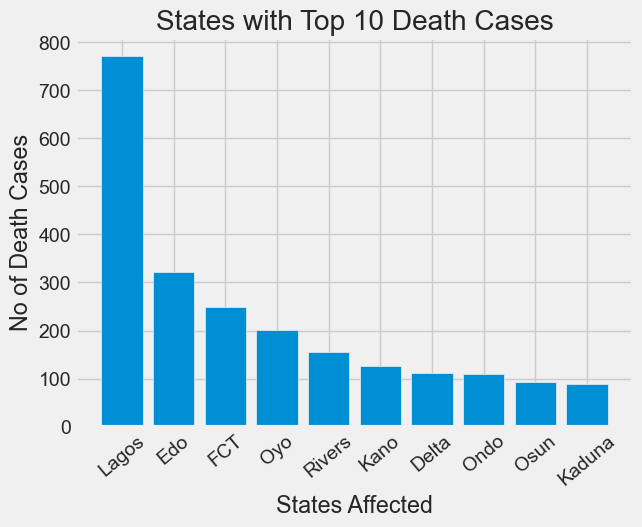

In [49]:
# I then visualize the data using the syntax below:
plt.bar(x='states_affected', height='no_deaths', data=top_10_death)
plt.title('States with Top 10 Death Cases')
plt.xticks(rotation=40)
plt.xlabel('States Affected')
plt.ylabel('No of Death Cases');

TODO E - Generate a line plot for the total daily confirmed, recovered and death cases in Nigeria

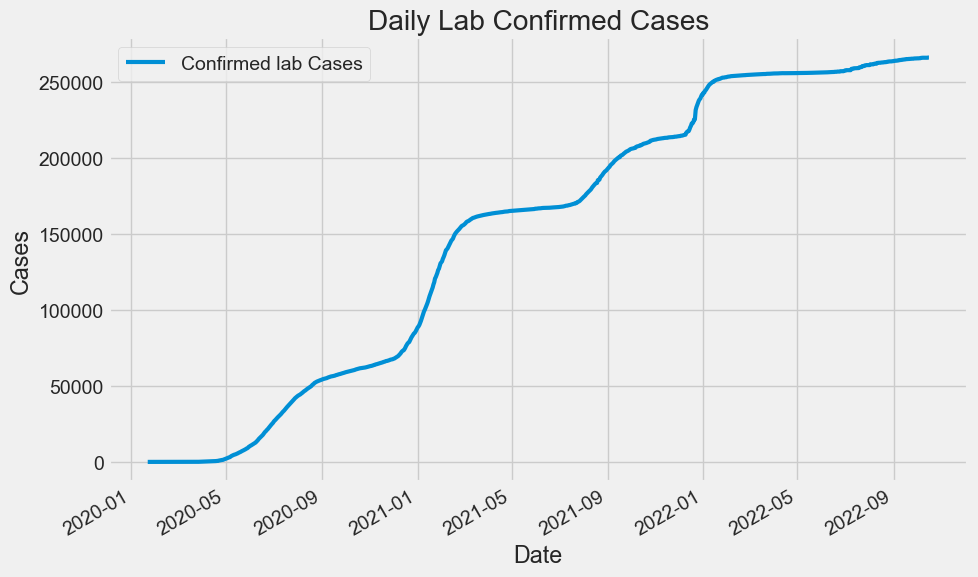

In [50]:
# I generated plot for the daily lab-confirmed, recovered, and death cases as follows:

date = dlcc_df['date']
daily_confirmed_cases = dlcc_df['cases']
daily_recovered_cases = drc_df['cases']
daily_death_cases = ddc_df['cases']

plt.figure(figsize=(10, 6))

plt.plot(date, daily_confirmed_cases,
              linestyle='solid', lw=3,
              label='Confirmed lab Cases')

plt.gcf().autofmt_xdate() # I used this method to auto format the date labels

plt.title('Daily Lab Confirmed Cases')
plt.xlabel('Date')
plt.ylabel('Cases')
plt.tight_layout()
plt.legend()
plt.savefig('daily lab confirmed cases plot.png'); # to save the fig to the repository

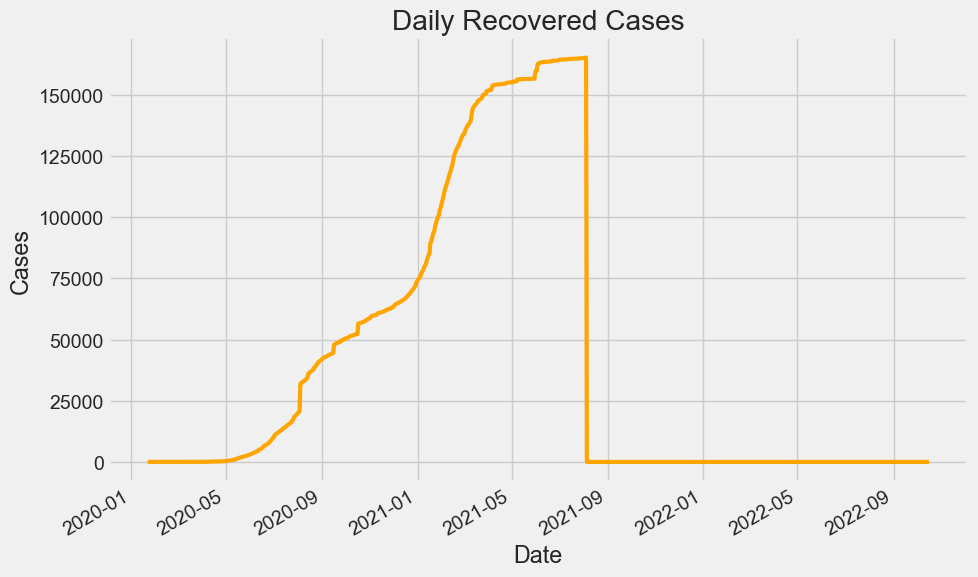

In [51]:
plt.figure(figsize=(10, 6))

plt.plot(date, daily_recovered_cases, linestyle='solid',
         label='Recovered Cases', lw=3, color='orange')

plt.gcf().autofmt_xdate()

plt.title('Daily Recovered Cases')
plt.xlabel('Date')
plt.ylabel('Cases')
plt.tight_layout()

plt.savefig('daily recovered cases plot.png');

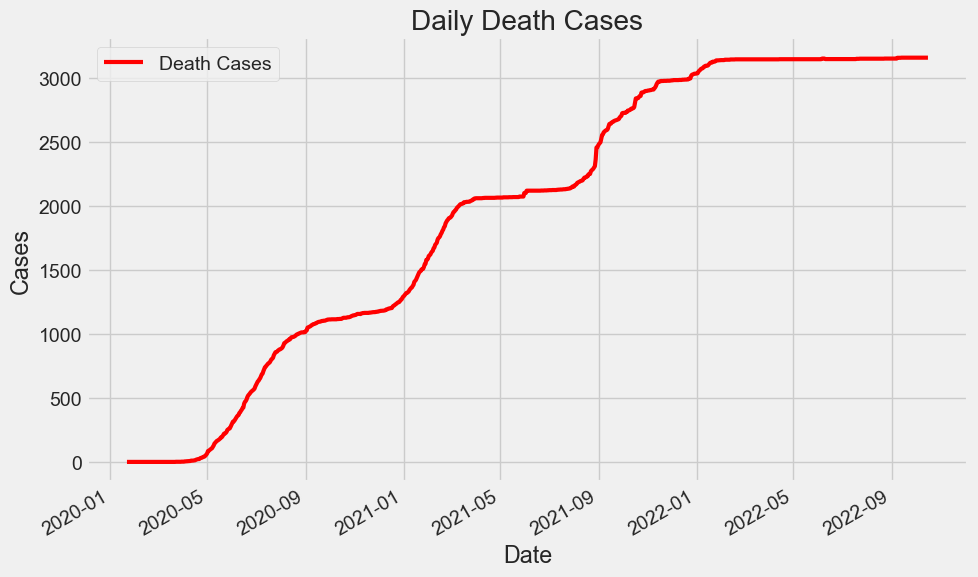

In [52]:
plt.figure(figsize=(10, 6))

plt.plot(date, daily_death_cases, linestyle='solid',
         label='Death Cases', lw=3,
         color='red')

plt.gcf().autofmt_xdate()

plt.title('Daily Death Cases')
plt.xlabel('Date')
plt.ylabel('Cases')
plt.tight_layout()
plt.legend()
plt.savefig('daily death cases plot.png');

#### Observation from the daily cases plot

- Covid cases where first confirmed in the month of January in 2020
- Daily lab-confirmed cases and death cases started to surge in the month of may, 2020 which is the second month in the 2nd quarter of 2020
- Daily recovered cases plumeted in July which also is the 2nd month of the 3rd quarter of 2021 and we barely recorded recovered cases

TODO F - 
* Determine the daily infection rate, you can use the Pandas `diff` method to find the derivate of the total cases.
* Generate a line plot for the above

In [53]:
# To calculate the daily infection rate, I used the daily confirmed lab cases

dlcc_df['daily_infection_rate'] = dlcc_df['cases'].diff()
dlcc_df.tail()

,date,cases,daily_infection_rate
994,2022-10-12,265816,0.0
995,2022-10-13,265816,0.0
996,2022-10-14,265816,0.0
997,2022-10-15,265937,121.0
998,2022-10-16,265937,0.0


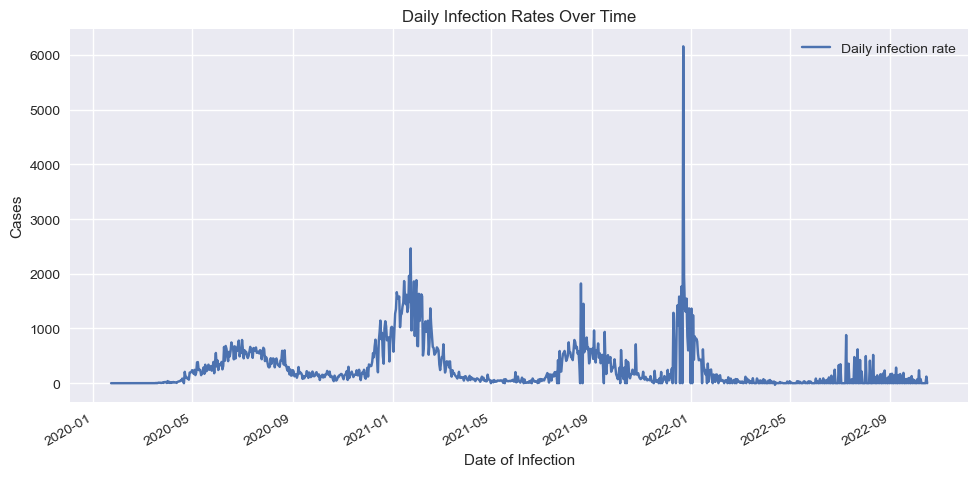

In [54]:
# I plot a viz to further explain the findings from the calculation of daily infection rates as follows

plt.style.use('seaborn')
plt.figure(figsize=(10, 5))
x = dlcc_df.date
y = dlcc_df.daily_infection_rate
plt.plot(x, y, label='Daily infection rate',
             linestyle='solid')

plt.gcf().autofmt_xdate()
plt.title('Daily Infection Rates Over Time')
plt.xlabel('Date of Infection')
plt.ylabel('Cases')
plt.tight_layout()
plt.legend()
plt.savefig('daily_infection_rate_plot.png');

TODO G - 
* Calculate maximum infection rate for a day (Number of new cases)
* Find the date

In [55]:
# I looked for the maximum value of the daily infection rate
dlcc_df['daily_infection_rate'].max()

6158.0

In [56]:
# I then filtered the dataframe based on the maximum value

dlcc_df[dlcc_df['daily_infection_rate'] == dlcc_df['daily_infection_rate'].max()][['date', 'daily_infection_rate']]

,date,daily_infection_rate
700,2021-12-22,6158.0


#### The the maximum number of daily new cases or confirmed cases and the date are 

- 6158 &
- 2021-12-22 respectively

This insight corresponds to the observation from the visualization of the daily infection rate

TODO H - Determine the relationship between the external dataset and the NCDC COVID-19 dataset. 
Here you will generate a line plot of top 10 confirmed cases and the overall community vulnerability index on the same axis. From the graph, explain your observation.
<br>
Steps
* Combine the two dataset together on a common column(states)
* Create a new dataframe for plotting. This DataFrame will contain top 10 states in terms of confirmed cases i.e sort by confirmed cases. ** Hint: Check out Pandas [nlargest](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nlargest.html) function. This [tutorial](https://cmdlinetips.com/2019/03/how-to-select-top-n-rows-with-the-largest-values-in-a-columns-in-pandas/) can help out ** 
* Plot both variable on the same axis. Check out this [tutorial](http://kitchingroup.cheme.cmu.edu/blog/2013/09/13/Plotting-two-datasets-with-very-different-scales/)

In [57]:
# I renamed the state column in the ncdc dataset to match witb the external data set in the repo
ncdc_df.rename(columns = {'states_affected': 'states'}, inplace = True)

# I then combined the 2 dataframe to prepare for the plot to a variable called the com_cov which is short for combined covid19 dataset
com_cov = ncdc_df.merge(cov_ext, on = 'states', how = 'outer')
com_cov.head()

,states,no_cases_lab_confirmed,no_cases_admission,no_discharged,no_deaths,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
0,Lagos,104014.0,871.0,102372.0,771.0,South West,13992000.0,0.0,0.1,1.0,0.3,0.1,1.0,0.1,0.4,0.93
1,FCT,29464.0,143.0,29072.0,249.0,North Central,4865000.0,0.3,0.0,0.9,0.4,0.6,0.9,0.6,0.2,0.79
2,Rivers,18044.0,89.0,17800.0,155.0,South South,7763000.0,0.4,0.5,0.9,0.6,0.6,0.9,0.1,0.1,1.00
3,Kaduna,11576.0,11.0,11476.0,89.0,North West,9227000.0,0.7,0.1,0.9,0.8,0.9,0.4,0.6,0.4,0.86
4,Oyo,10332.0,3.0,10127.0,202.0,South West,8737000.0,0.2,0.7,0.8,0.2,0.8,0.6,0.2,0.3,1.06


In [58]:
# I filtered for the top 10 covid cases in the combined data set
top_10_cov_state = com_cov.nlargest(10, 'no_cases_lab_confirmed')[['states', 'no_cases_lab_confirmed', 'Overall CCVI Index']]
top_10_cov_state

,states,no_cases_lab_confirmed,Overall CCVI Index
0,Lagos,104014.0,0.0
1,FCT,29464.0,0.3
2,Rivers,18044.0,0.4
3,Kaduna,11576.0,0.7
4,Oyo,10332.0,0.2
5,Plateau,10330.0,0.4
6,Edo,7923.0,0.1
7,Ogun,5810.0,0.3
8,Delta,5784.0,0.4
9,Kano,5339.0,0.6


''

<Figure size 1000x500 with 0 Axes>

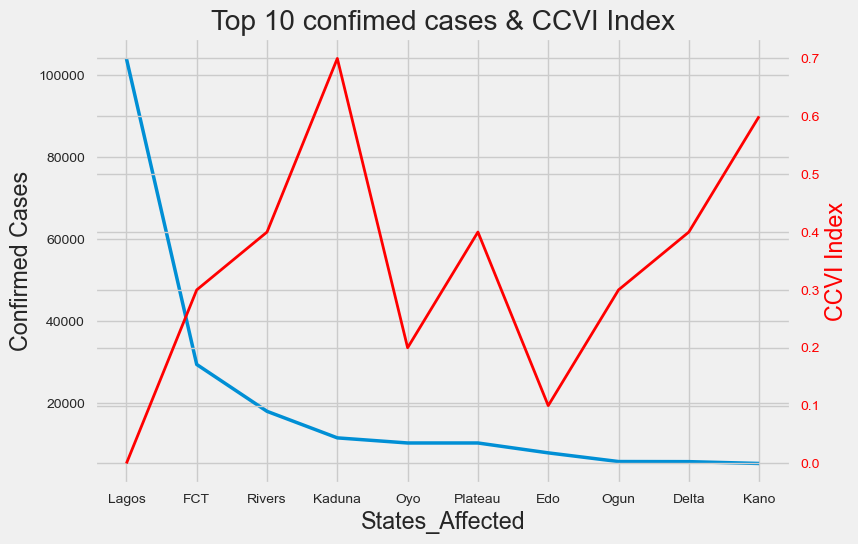

In [59]:
a = top_10_cov_state.states
b = top_10_cov_state.no_cases_lab_confirmed
c = top_10_cov_state['Overall CCVI Index']


plt.figure(figsize=(10, 5))
plt.style.use('fivethirtyeight')
fig = plt.figure()

ax1 = fig.add_subplot(111)
ax1.plot(a, b, lw = 2.5)
ax1.set_ylabel('Confirmed Cases')
plt.xlabel('States_Affected')
plt.title('Top 10 confimed cases & CCVI Index')

ax2 = ax1.twinx()
ax2.plot(a, c, 'r-', lw = 2)
ax2.set_ylabel('CCVI Index', color='r')
for tl in ax2.get_yticklabels():
    tl.set_color('r')
;

###### OBSERVATION
- The state with the least Vulnerability index is lagos which happens to be the most populous state in the data frame
- The state with the most vulnerability is Kaduna
- The state with most cases is Lagos state while the state with the least number of cases is Kano State

TODO I - Determine the relationship between the external dataset and the NCDC COVID-19 dataset.

- Here you will generate a regression plot between two variables to visualize the linear relationships - Confirmed Cases and Population Density. Hint: Check out Seaborn [Regression Plot](https://seaborn.pydata.org/generated/seaborn.regplot.html).
- Provide a summary of your observation

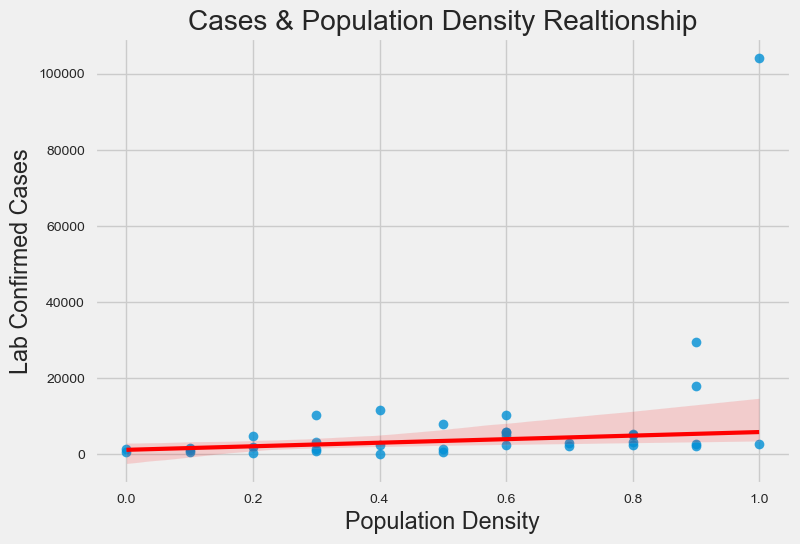

In [60]:
sns.regplot('Population Density', 'no_cases_lab_confirmed', 
            data = com_cov, robust = True,
           line_kws={'lw': 3, 'color': 'r'})
plt.title('Cases & Population Density Realtionship')
plt.ylabel('Lab Confirmed Cases');

#### Observation

- There is little to no relationship between lab confirmed cases and the population density


TODO J -

- Provide more analyses by extending TODO G & H. Meaning, determine relationships between more features.
-Provide a detailed summary of your findings.
Note that you can have as many as possible.

In [61]:
# I calculated the infection rate by population of each size and placed it in a new variable titled states_infection_rate to check for possible correlation

com_cov['states_infection_rate'] = com_cov.no_cases_lab_confirmed/com_cov.Population
com_cov.to_csv('ncdc and external covid19 data.csv', index=False) # to save the combined data to the repository for reference purposes
com_cov.head()

,states,no_cases_lab_confirmed,no_cases_admission,no_discharged,no_deaths,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR,states_infection_rate
0,Lagos,104014.0,871.0,102372.0,771.0,South West,13992000.0,0.0,0.1,1.0,0.3,0.1,1.0,0.1,0.4,0.93,0.007434
1,FCT,29464.0,143.0,29072.0,249.0,North Central,4865000.0,0.3,0.0,0.9,0.4,0.6,0.9,0.6,0.2,0.79,0.006056
2,Rivers,18044.0,89.0,17800.0,155.0,South South,7763000.0,0.4,0.5,0.9,0.6,0.6,0.9,0.1,0.1,1.00,0.002324
3,Kaduna,11576.0,11.0,11476.0,89.0,North West,9227000.0,0.7,0.1,0.9,0.8,0.9,0.4,0.6,0.4,0.86,0.001255
4,Oyo,10332.0,3.0,10127.0,202.0,South West,8737000.0,0.2,0.7,0.8,0.2,0.8,0.6,0.2,0.3,1.06,0.001183


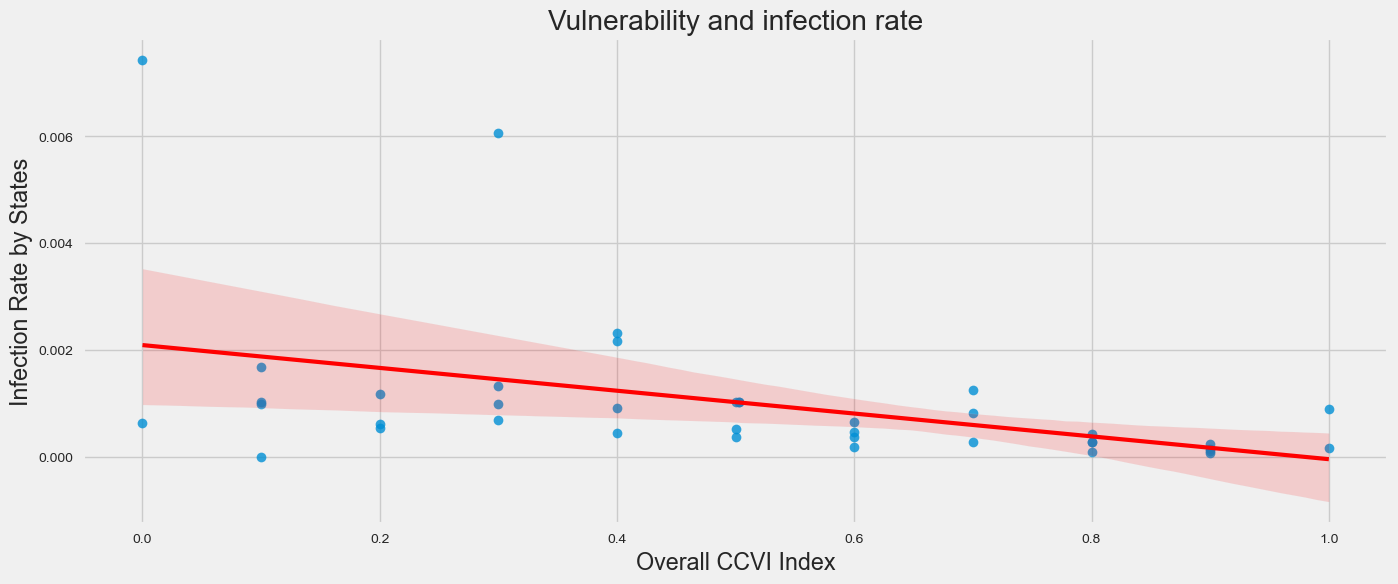

In [62]:
# I then plotted the states infection rate and overall ccvi index to ascertain correlation:

# to take care of my missing values in the data set I filled them with the average of the variable
nans = com_cov.states_infection_rate.mean()
nanc = com_cov['Overall CCVI Index'].mean()
com_cov.states_infection_rate.fillna(nans, inplace=True)
com_cov['Overall CCVI Index'].fillna(nanc, inplace=True)


x = com_cov['Overall CCVI Index']
y = com_cov.states_infection_rate


plt.figure(figsize=(15, 6))

sns.regplot(x, y,
           line_kws={'lw': 3, 'color': 'r'})
plt.title('Vulnerability and infection rate')
plt.ylabel('Infection Rate by States');

## Observation

- this plot shows a negative corelation btw vulnerability and infection rate by population
- the lower the vulnerability the higher the infection rate per population

In [63]:
# Lets also calculate the corelation to investigate this claim further:

x.corr(y) # I used this function to take the correlation of infection rate by population and overall ccvi index of the data

print('The correlation coefficient of Overall CCVI index and the daily infection rate bby population is:=', x.corr(y))

The correlation coefficient of Overall CCVI index and the daily infection rate bby population is:= -0.42893659500442827


## Observation

- From the above program it can be observed that overall ccvi index and daily infection rate has a negative correlation ship

TODO L -
Determine the effect of the Pandemic on the economy. To do this, you will compare the Real GDP value Pre-COVID-19 with Real GDP in 2020 (COVID-19 Period, especially Q2 2020)
Steps

- From the Real GDP Data, generate a barplot using the GDP values for each year & quarters. For example: On x-axis you will have year 2017 and the bars will be values of each quarters(Q1-Q4). You expected to have subplots of each quarters on one graph.
- Hint: Use [Pandas.melt](https://pandas.pydata.org/docs/reference/api/pandas.melt.html) to create your plot DataFrame
- Set your quarter legend to lower left.
- Using axhline, draw a horizontal line through the graph at the value of Q2 2020.
- Write out your observation

In [64]:
# I used the pandas melt function to covert the data to a long data format 
gdp_df = pd.melt(gdp, id_vars = 'Year', var_name = 'quarters', value_name = 'gross_domestic_products')
gdp_df.sort_values(['Year', 'quarters'], ignore_index=True, inplace=True)

In [73]:
# GDPs for 2020
gdp_df[gdp_df['Year'] == 2020]

,Year,quarters,gross_domestic_products
24,2020,Q1,16740000.0
25,2020,Q2,15890000.0
26,2020,Q3,17820000.0
27,2020,Q4,0.0


In [65]:
# I used the code chuck to get the value of the gdp for Q2 of 2020
print(gdp_df[(gdp_df['Year'] == 2020) & (gdp_df['quarters'] == 'Q2')]['gross_domestic_products']) # I used this to located the index number of the value:
Q2_2020 = gdp_df.loc[25, 'gross_domestic_products'] # I used this to find the value of the gdp for 2020
Q2_2020

25    15890000.0
Name: gross_domestic_products, dtype: float64


15890000.0

## I created three visualization for my analysis

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


''

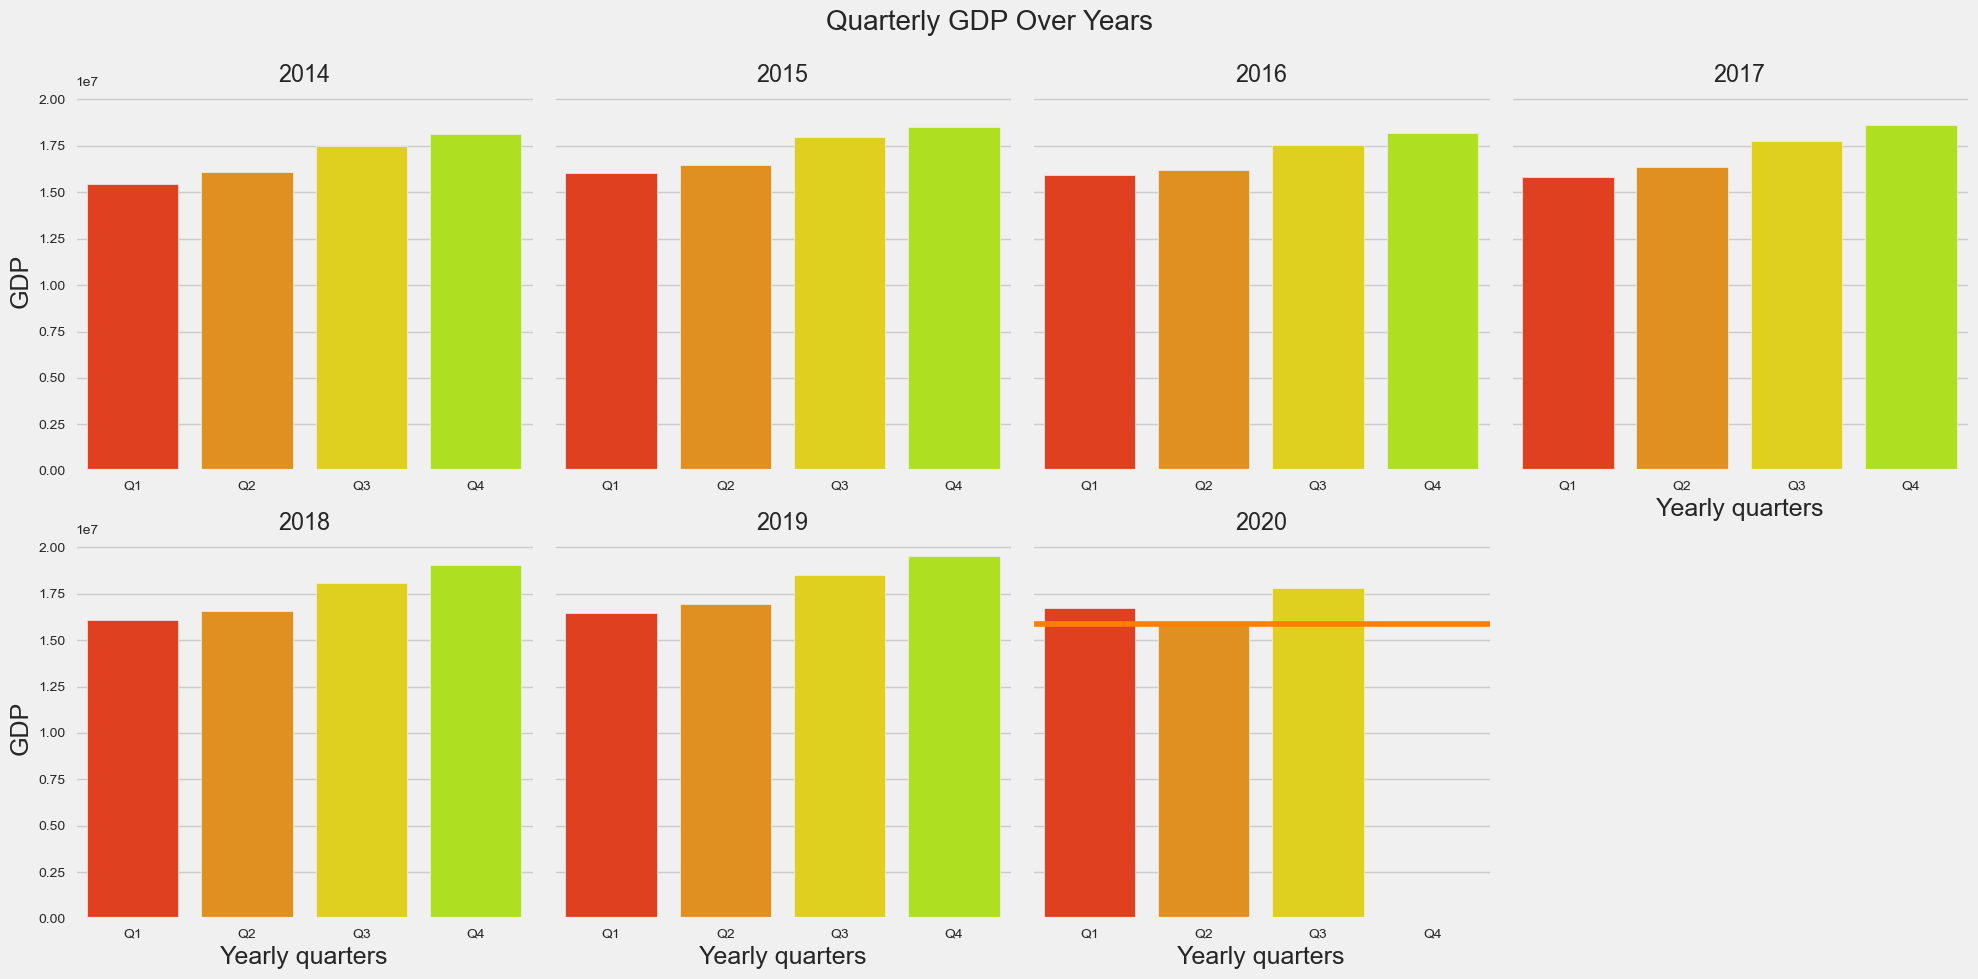

In [66]:
#  I created facetgrid for each quarter to analyse the impact of covid19 on the economy as follows:

# Viz 1
# to rearange the visualization for more insight:
g = sns.FacetGrid(gdp_df, col = 'Year', col_wrap = 4,  size=5, sharex=False,
                  )
g.map_dataframe(sns.barplot, x = 'quarters', y = 'gross_domestic_products',
                  palette = 'prism')
plt.legend(loc = 'upper left')
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Quarterly GDP Over Years', fontsize = 20)
g.set_ylabels('GDP', fontsize = 18)
g.set_xlabels('Yearly quarters', fontsize = 18)
g.set_titles(col_template = '{col_name}')
plt.axhline(Q2_2020, color = '#FF8000')
plt.savefig('gdp_by_quarter_plot.png') # I used this line to save the plot to the repository
# plt.xticks([0, 1, 2, 3], ['Q1', 'Q2', 'Q3', 'Q4']) # This altered the visual xtixks value hence viz mis represented
;

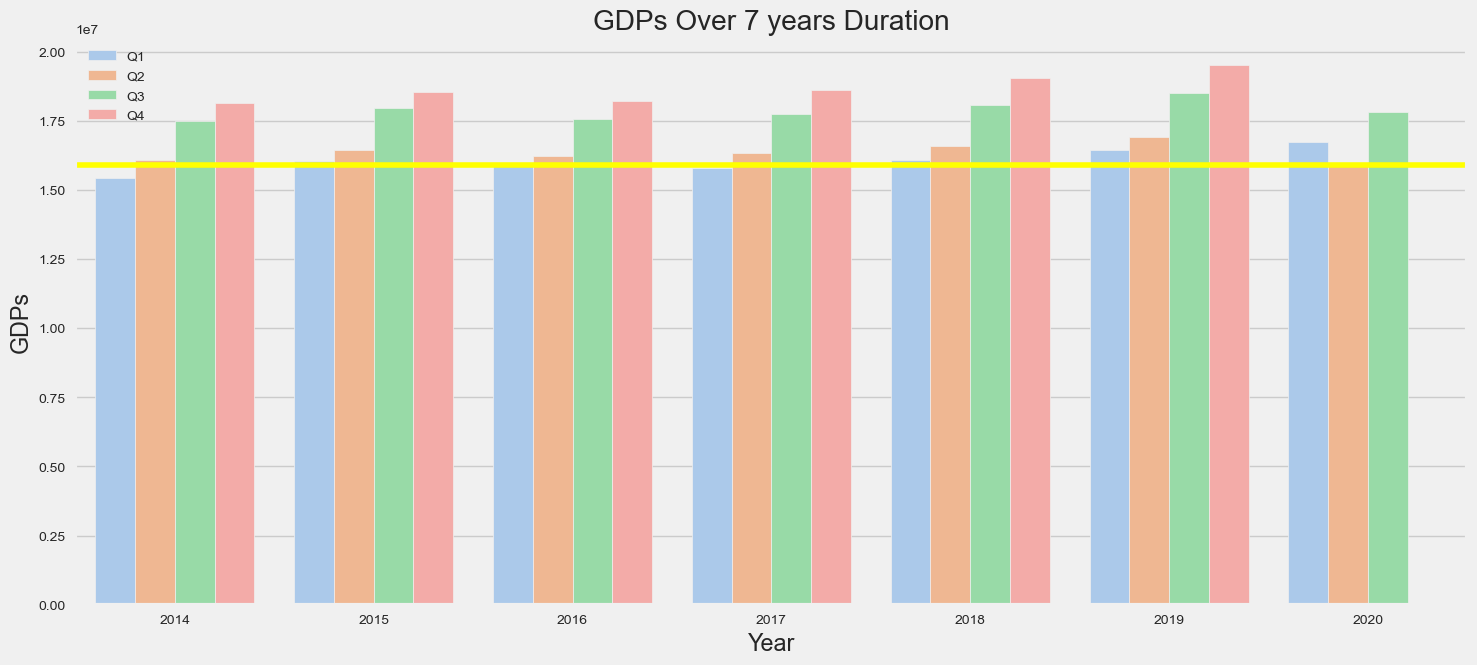

In [67]:
# Viz 2
plt.figure(figsize = (16, 7))
plt.style.use('fivethirtyeight')
sns.barplot(data = gdp_df, x = 'Year', y = 'gross_domestic_products', palette = 'pastel',
            hue = 'quarters', hue_order = ['Q1', 'Q2', 'Q3', 'Q4'])
plt.axhline(Q2_2020, color = '#FFFF00')
plt.title('GDPs Over 7 years Duration')
plt.ylabel('GDPs')
plt.legend(loc = 'upper left')
plt.savefig('gdp_by_quarter2_plot.png');

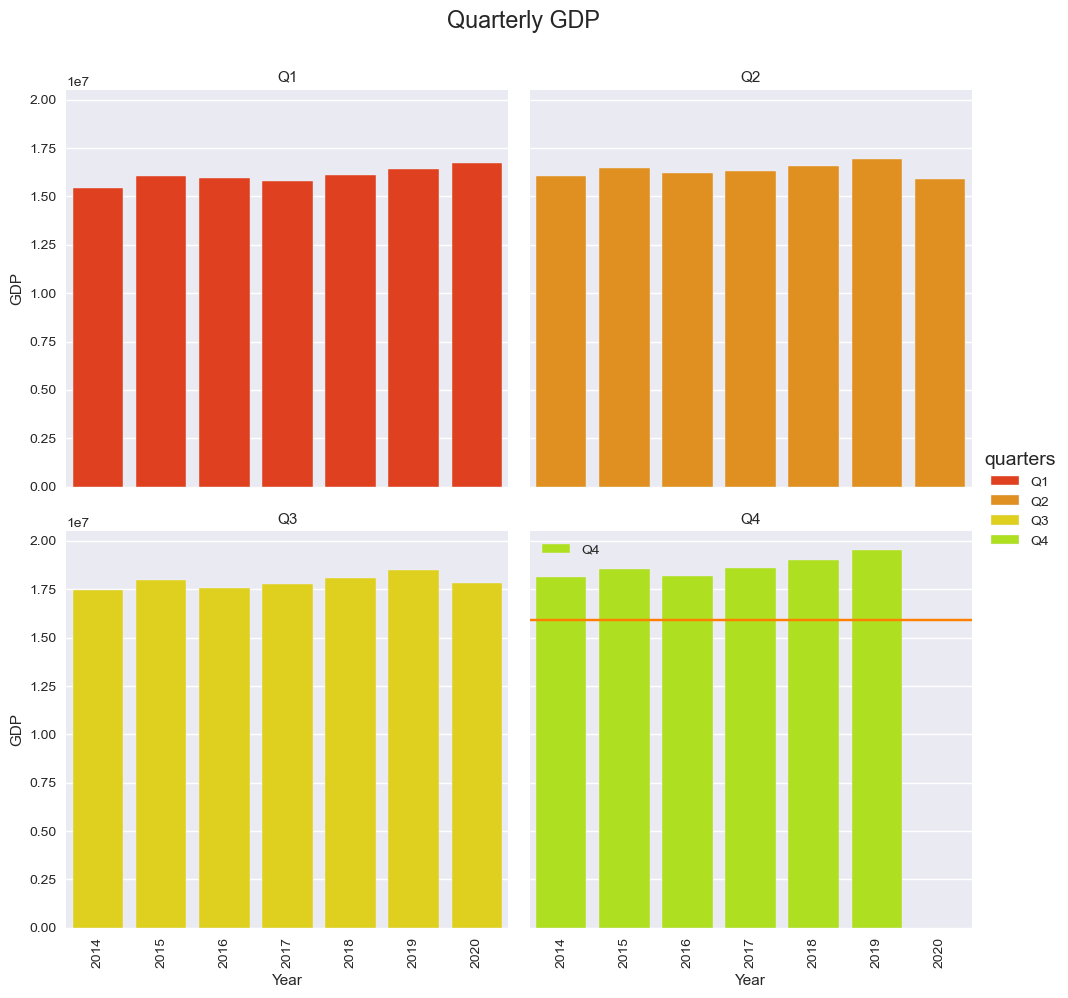

In [68]:
# Viz 3
plt.style.use('seaborn')
g = sns.FacetGrid(gdp_df, col = 'quarters', col_wrap = 2, palette = 'prism', hue = 'quarters',
                  hue_order = ['Q1', 'Q2', 'Q3', 'Q4'], col_order = ['Q1', 'Q2', 'Q3', 'Q4'], size=5
                  )
g.map_dataframe(sns.barplot, x = 'Year', y = 'gross_domestic_products')
plt.legend(loc = 'upper left')
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Quarterly GDP')
g.set_ylabels('GDP')
g.set_titles(col_template = '{col_name}')
g.set_xticklabels(rotation = 90)
g.add_legend()
plt.axhline(Q2_2020, color = '#FF8000');

### Observation:
- The gross domestic products was increasing quarterly over the previous successive years save for 2020
- The gross domestic products for the year 2020 was rather undulating compared to other years
- There was zero gdp for the fourth(4) quarter of 2020 which indicates a drastic colapse of the economy

### Conclusion
- The effect of covid19 on the economy was outright devastating and destructive
- Prior to 2020, Nigeria experience a growth rate in seemingly arithmetic progression
- In the 2nd Quarter of 2020, there was a retracted growth or a deep from the first quarter gdp
- In the fourth(4) quarter of 2020, there was no value recorded for gross domestic product. The economy was completely shut down due to alarming spacks or death rate and the daily confirmed cases.

# You can find the executive summary and the documentation in the repository